Data Collection

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Load dataset
df = pd.read_csv(r"C:\Users\Sanket Gaikwad\OneDrive\Desktop\data_analyst_project\Electric Vehicle\Electric Vehicle Sales by State in India.csv")

In [2]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


Data Preprocessing

1.Convert Date Column

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1


2.Handle Missing Values

In [5]:
# Check missing values
df.isnull().sum()

# Example strategies
df['Vehicle_Class'].fillna('Unknown', inplace=True)
df['Vehicle_Category'].fillna('Unknown', inplace=True)
df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)


C:\Users\Sanket Gaikwad\AppData\Local\Temp\ipykernel_14504\2887521344.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle_Class'].fillna('Unknown', inplace=True)
C:\Users\Sanket Gaikwad\AppData\Local\Temp\ipykernel_14504\2887521344.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

Exploratory Data Analysis

1.EV Sales Trend Over Time

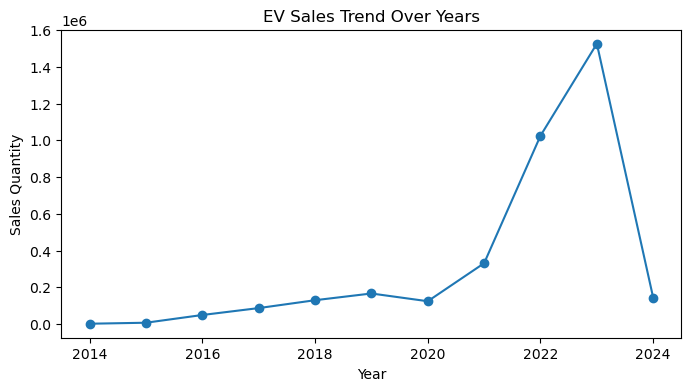

In [7]:
import matplotlib.pyplot as plt

sales_trend = df.groupby('Year')['EV_Sales_Quantity'].sum()

sales_trend.plot(kind='line', marker='o', figsize=(8,4))
plt.title("EV Sales Trend Over Years")
plt.ylabel("Sales Quantity")
plt.show()


2.State-wise EV Sales

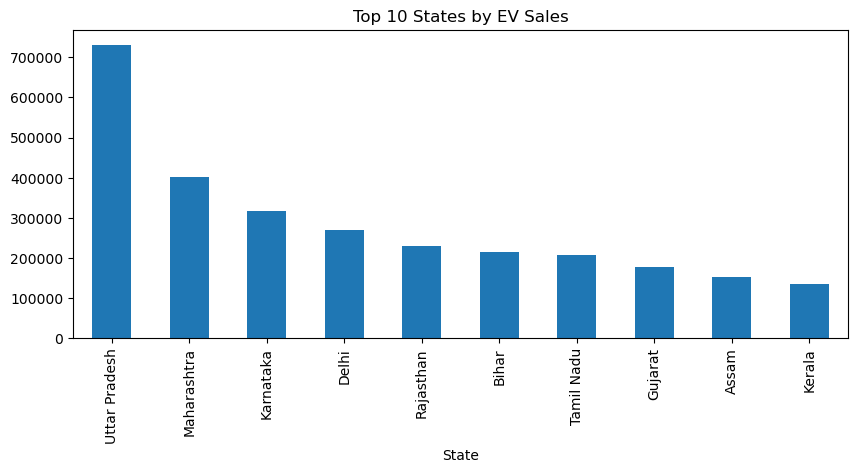

In [8]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

state_sales.head(10).plot(kind='bar', figsize=(10,4))
plt.title("Top 10 States by EV Sales")
plt.show()


Feature Engineering

1.Date Features

In [7]:
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
quarterly_sales = df.groupby('Quarter')['EV_Sales_Quantity'].sum()


Encode Categorical Variables

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'Month_Name']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [10]:
X = df.drop(columns=['EV_Sales_Quantity','Date'])
y = df['EV_Sales_Quantity']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Check Which Model Is Suitable for Your Dataset

1.Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, lr_pred))


Linear Regression R²: 0.028433151786001476


2.Tree-Based Models

Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print("Decision Tree R²:", r2_score(y_test, dt_pred))


Decision Tree R²: 0.9210720762926213


Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest R²:", r2_score(y_test, rf_pred))


Random Forest R²: 0.9431261798968693


Boosting Models

1.XGBoost

In [17]:
%pip install xgboost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
print("XGBoost R²:", r2_score(y_test, xgb_pred))



   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.8/101.7 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 1.0/101.7 MB 1.2 MB/s eta 0:01:24
    --------------------------------------- 1.3/101.7 MB 1.2 MB/s eta 0:01:24
    --------------------------------------- 1.6/101.7 MB 1.2 MB/s eta 0:01:23
    --------------------------------------- 1.8/101.7 MB 1.2 MB/s eta 0:01:22
    --------------------------------------- 2.1/101.7 MB 1.3 MB/s eta 0:01:19
    --------------------------------------- 2.4/101.7 MB 1.2 MB/s eta 0:01:20
   - -------------------------------------- 2.6/101.7 MB 1.3 MB/s eta 0:01:19
   - -------------------------------------- 3.1/101.7 MB 1.3 MB/s eta 0:01:16
   - -------------------------------------- 3.4/101.7 MB 1.3 MB/s eta 0:01:14

LightGBM

Compare Models

In [18]:
results = {
    "Model": ["Linear", "Decision Tree", "Random Forest", "XGBoost", ],
    "R2": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, dt_pred),
        r2_score(y_test, rf_pred),
        r2_score(y_test, xgb_pred)
        
    ]
}

pd.DataFrame(results).sort_values(by="R2", ascending=False)


,Model,R2
2,Random Forest,0.943126
1,Decision Tree,0.921072
3,XGBoost,0.859153
0,Linear,0.028433


Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    RandomForestRegressor(n_estimators=200, random_state=42),
    X, y,
    cv=5,
    scoring='r2'
)

print("Mean CV R²:", cv_scores.mean())
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

Mean CV R²: 0.9399121922684686
State               0.500479
Year                0.155449
Vehicle_Class       0.148835
Vehicle_Type        0.078594
Vehicle_Category    0.062768
Month               0.025160
Month_Name          0.019102
Quarter             0.009613
Day                 0.000000
dtype: float64


Model Training

In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

Model Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 20.290433992125426
RMSE: 182.82130344898187
R² Score: 0.8716483379562612


Feature Importance

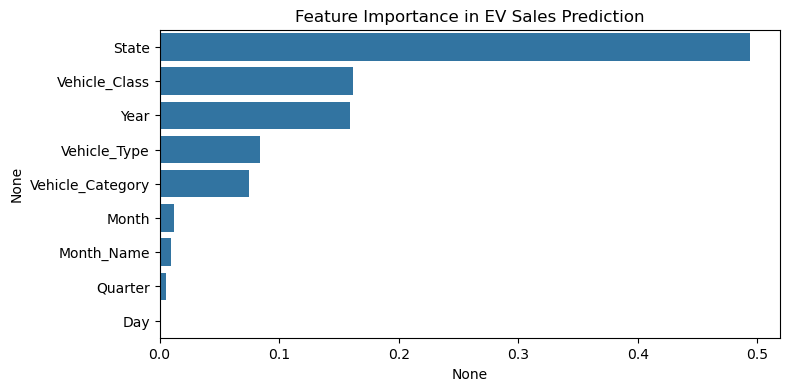

In [25]:
import seaborn as sns

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance in EV Sales Prediction")
plt.show()


Time-Series Forecasting

In [28]:
ts_data = df.groupby('Date')['EV_Sales_Quantity'].sum().reset_index()
ts_data.set_index('Date', inplace=True)
   


In [31]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_data, order=(1,1,1))
arima_result = model.fit()

forecast = arima_result.forecast(steps=12)
print("Next 12 months forecast:")
print(forecast)




Next 12 months forecast:
121    70106.384379
122    46492.012542
123    36825.323809
124    32868.205165
125    31248.334246
126    30585.230097
127    30313.784324
128    30202.666323
129    30157.179484
130    30138.559166
131    30130.936824
132    30127.816571
Name: predicted_mean, dtype: float64


c:\Users\Sanket Gaikwad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sanket Gaikwad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sanket Gaikwad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sanket Gaikwad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

To save Model

In [32]:
import pickle

In [33]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [34]:
with open('rf_model.pkl', 'rb') as f:
    mp=pickle.load(f)